# Pipelines and Hyperparameter Tuning 


### In this assignment, you will be putting together everything you have learned so far. You will need to find your own dataset, do all the appropriate preprocessing, test different supervised learning models and evaluate the results. More details for each step can be found below.

### You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Data Input 

Import the dataset you will be using. You can download the dataset onto your computer and read it in using pandas, or download it directly from the website. Answer the questions below about the dataset you selected. 

To find a dataset, you can use the resources listed in the notes. The dataset can be numerical, categorical, text-based or mixed. If you want help finding a particular dataset related to your interests, please email the instructor.

**You cannot use a dataset that was used for a previous assignment or in class**

In [2]:
# Import dataset (1 mark)
from yellowbrick.datasets import load_mushroom
X, y = load_mushroom()

print('X.shape={}, type(X)={}'.format(X.shape, type(X)))
print('y.shape={}, type(y)={}'.format(y.shape, type(y)))


X.shape=(8123, 3), type(X)=<class 'pandas.core.frame.DataFrame'>
y.shape=(8123,), type(y)=<class 'pandas.core.series.Series'>


In [3]:
# Get information about dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   shape    8123 non-null   object
 1   surface  8123 non-null   object
 2   color    8123 non-null   object
dtypes: object(3)
memory usage: 190.5+ KB


In [4]:
#See if dataset is imbalanced for target vector 
type_mushroom = set(y.values)
for type in type_mushroom: 
    print("Class {} has {} samples". format(type,(y==type).sum()))

Class edible has 4208 samples
Class poisonous has 3915 samples


### Questions 

1. (1 mark) What is the source of your dataset?
1. (1 mark) Why did you pick this particular dataset?
1. (1 mark) Was there anything challenging about finding a dataset that you wanted to use?

*ANSWER HERE*

1. The source of my dataset is yellowbrick datasets. https://www.scikit-yb.org/en/latest/api/datasets/mushroom.html
2. I picked this dataset because I was interested in working with a classification problem with a dataset that required data pre-processing. I found this dataset interesting and also I was able to understand the dataset. 
3. The challenge with finding a dataset was deciding what type of supervised learning problem I was interested in and then finding data where I was able to understand what the features meant. There were some datasets that were very complex as they were based off of complex scientific problems.  

## Step 2: Data Processing 

The next step is to process your data. Implement the following steps as needed.

In [5]:
# Clean data (if needed)

#Check for missing values - no missing values
print("Number of null values in Feature matrix\n", X.isnull().sum())
print("Number of null values in Target",y.isnull().sum())

Number of null values in Feature matrix
 shape      0
surface    0
color      0
dtype: int64
Number of null values in Target 0


In [6]:
#See what kind of data the feature matrix has
print(X.head())
print("\n", y.head())

    shape surface   color
0  convex  smooth  yellow
1    bell  smooth   white
2  convex   scaly   white
3  convex  smooth    gray
4  convex   scaly  yellow

 0       edible
1       edible
2    poisonous
3       edible
4       edible
Name: target, dtype: object


In [7]:
# Implement preprocessing steps. Remember to use ColumnTransformer if more than one preprocessing method is needed

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#enc = OneHotEncoder()
X_enc = pd.get_dummies(X, drop_first=True)

#Label Encoding for Target Vector  
enc_label = LabelEncoder()
y_enc = enc_label.fit(y).transform(y)

print("Encoded Feature", X_enc)
print("Encoded Target", y_enc)
print("Class names in Target", enc_label.classes_)

Encoded Feature       shape_conical  shape_convex  shape_flat  shape_knobbed  shape_sunken  \
0                 0             1           0              0             0   
1                 0             0           0              0             0   
2                 0             1           0              0             0   
3                 0             1           0              0             0   
4                 0             1           0              0             0   
...             ...           ...         ...            ...           ...   
8118              0             0           0              1             0   
8119              0             1           0              0             0   
8120              0             0           1              0             0   
8121              0             0           0              1             0   
8122              0             1           0              0             0   

      surface_grooves  surface_scaly  surface_s

### Questions

1. (1 mark) Were there any missing/null values in your dataset? If yes, how did you replace them and why? If no, describe how you would've replaced them and why.
2. (1 mark) What type of data do you have? What preprocessing methods would you have to apply based on your data types?

*ANSWER HERE*

1. There are no missing/null values in the dataset. If there are a significant number of values missing, I would drop the column or row based on if it is the column missing most of the values or the data sample. If there are only a few missing values, the mode can be used to replace the missing value. I looked at the statistics of the data to determine what would be the best method to removing missing values. 

2. The feature matrix and target vector consists of categorial nominal attributes(shape, surface and colour), all object data type. Therefore, the preprocessing method one hot encoding is required to change the string values to numeric values that the machine learning model can use. Target vector is categorical discrete value of edible or poisinous. For target vector, I used Label Encoder since we want the "edible" mushroom as the "0" negative class and "poisinous" mushroom to be "1" as the postive class.  

## Step 3: Implement Machine Learning Model 

In this section, you will implement three different supervised learning models (one linear and two non-linear) of your choice. You will use a pipeline to help you decide which model and hyperparameters work best. It is up to you to select what models to use and what hyperparameters to test. You can use the class examples for guidance. You must print out the best model parameters and results after the grid search.

In [8]:
#Split the data into training and testing sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, stratify=y, test_size = 0.2, random_state=42)

In [9]:
# Implement pipeline and grid search here. Can add more code blocks if necessary

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score


#Build Pipeline for each model 

#Linear Regression
lr_pipeline = Pipeline([
    ('encoder', OneHotEncoder()), 
    ('classifier', LogisticRegression(max_iter=1000))
])

#Non-Linear : Random Forest Classifier
rf_pipeline = Pipeline([
    ('encoder', OneHotEncoder()), 
    ('classifier', RandomForestClassifier(random_state=42))
])
#Non-Linear : Support Vector Machine
svm_pipeline = Pipeline([
    ('encoder', OneHotEncoder()), 
    ('classifier', SVC())
])

# Define parameter grids 

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1','l2'],  
    'classifier__solver': ['liblinear']  
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, 20]
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': [0.001, 0.01, 0.1] 
}

scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'f1_score' : make_scorer(f1_score)
}


In [10]:
#Linear Model: Logistic Regression 

#Create GridSearchCV instance for this model 
grid_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring=scoring,return_train_score=True, refit='f1_score')

#Fit the model to the training set 
grid_lr.fit(X_train, y_train)

#Determine the best parameters and cv results from the grid search 
best_params_lr = grid_lr.best_params_
results_lr = grid_lr.cv_results_

print("\nLogistic Regression Results:")
print("Best CV Training Accuracy: {:.2f}".format(results_lr['mean_train_accuracy'].max()))
print("Best CV Validation Accuracy: {:.2f}".format(results_lr['mean_test_accuracy'].max()))
print("F1 scores:{:.2f}".format(results_lr['mean_test_f1_score'].max()))
print("\nBest Parameters for Logistic Regression based on F1:", best_params_lr)



Logistic Regression Results:
Best CV Training Accuracy: 0.67
Best CV Validation Accuracy: 0.67
F1 scores:0.66

Best Parameters for Logistic Regression based on F1: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [11]:
#Non-Linear Model: Random Forest 

#Create GridSearchCV instance for this model 
grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring=scoring,return_train_score=True, refit='f1_score')

#Fit the model to the training set 
grid_rf.fit(X_train, y_train)

#Determine the best parameters and cv results from the grid search 
best_params_rf = grid_rf.best_params_
results_rf = grid_rf.cv_results_

print("\nRandom Forest Results:")
print("Best CV Training Accuracy: {:.2f}".format(results_rf['mean_train_accuracy'].max()))
print("Best CV Validation Accuracy: {:.2f}".format(results_rf['mean_test_accuracy'].max()))
print("F1 scores:{:.2f}".format(results_rf['mean_test_f1_score'].max()))
print("\nBest Parameters for Random Forest based on F1:", best_params_rf)



Random Forest Results:
Best CV Training Accuracy: 0.72
Best CV Validation Accuracy: 0.72
F1 scores:0.72

Best Parameters for Random Forest based on F1: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}


In [12]:
#Non-Linear Model: Support Vector Machine

grid_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring=scoring,return_train_score=True, refit='f1_score')
grid_svm.fit(X_train, y_train)
best_params_svm = grid_svm.best_params_
results_svm = grid_svm.cv_results_

print("\nSVM Results:")
print("Best CV Training Accuracy: {:.2f}".format(results_svm['mean_train_accuracy'].max()))
print("Best CV Validation Accuracy: {:.2f}".format(results_svm['mean_test_accuracy'].max()))
print("F1 scores:{:.2f}".format(results_svm['mean_test_f1_score'].max()))  
print("\nBest Parameters for SVM based on F1:", best_params_svm)


SVM Results:
Best CV Training Accuracy: 0.72
Best CV Validation Accuracy: 0.72
F1 scores:0.71

Best Parameters for SVM based on F1: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}


### Questions

1. (1 mark) Do you need regression or classification models for your dataset?
1. (2 marks) Which models did you select for testing and why?
1. (2 marks) Which model worked the best? Does this make sense based on the theory discussed in the course and the context of your dataset?

*ANSWER HERE*

1. This dataset's target matrix is a categorical discrete value(1 for poisinous, 0 for edible) so we are interested in predicting a discrete value. Therefore, classification model is needed. 
2. 
    For the linear model, I picked Logistic regression. For the following reasons:
    -  this is a simple and widely used method which is easy to understand as the decision boundary is linear. It is a good place to start.
    -  it is possible to regularize this model to prevent overfitting. So we can tune the model based on C value. 

   For non-linear models. I picked Random forest and Support vector machines.

   I picked Random Forest because
    - it is an ensemble method so creates multiple trees to predict the results. This prevents overfitting and allows to achieve better results than decision tree
    - gradient boosting outputs better results but takes longer to train the model so it is a better idea to start wiht random forest. 
    - able to capture complex relationships 
    
   I picked  Support Vector Machine because
    - they are effective in high dimensional spaces, and work well with many features or limited features.
    - use non-linear decision boundary 
    - require careful tuning - can implement tuning while using grid search 

    Since we only looked at two non-linear models, I chose two models that are common and are known to perform well with classification problems but perform very differently to get an idea of which type of model works for this dataset. 

3. The model that worked the best was Random Forest where the training, validation and f1-score was the highest (around 0.72 for all). Yes, this aligns with what was discusssed in class and with the context of the dataset. 
This dataset gave better results for the non-linear models in comparison to the linear model so adding the complexity in model resulted in better results. This indicates the dataset is more suited for a non-linear model then linear.  Also, it was learnt in class that support vector machines are more sensitive to tuning hyperparameters then random forest. This could indicate why random forest performed better. There could be certain ranges of the support vector machine that have not been identified. 

## Step 4: Validate Model 

Use the testing set to calculate the testing accuracy for the best model determined in Step 3.

In [13]:
# Calculate testing accuracy (1 mark)
from sklearn.metrics import classification_report

#Retrain model with best model determined from grid search 
best_model = grid_rf.best_estimator_
best_model.fit(X_train, y_train)

#Make predictions using test set on best model
y_pred = best_model.predict(X_test)

#Calculate accuracy and f1 score on the test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Create Classification Report 
report = classification_report(y_test, y_pred)

print("Best Model Used:\n", grid_rf.best_estimator_)
print("Testing Accuracy:", accuracy)
print("Test f1 Score:", f1)
print("\nClassification Report:\n",report)


Best Model Used:
 Pipeline(steps=[('encoder', OneHotEncoder()),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=42))])
Testing Accuracy: 0.6750769230769231
Test f1 Score: 0.7040358744394619

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.56      0.64       842
           1       0.63      0.80      0.70       783

    accuracy                           0.68      1625
   macro avg       0.69      0.68      0.67      1625
weighted avg       0.69      0.68      0.67      1625



Text(0.5, 1.0, 'Confusion Matrix for edible vs poisonous mushrooms')

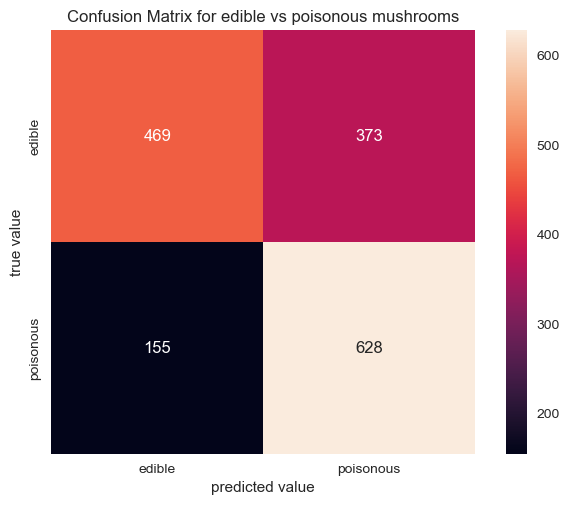

In [14]:
from sklearn.metrics import confusion_matrix
#Create Confusion matrix 
mat = confusion_matrix(y_test, y_pred)

labels=['edible','poisonous']
sns.heatmap(mat,xticklabels=labels,  yticklabels=labels, square=True, annot=True, fmt='g')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title("Confusion Matrix for edible vs poisonous mushrooms")


### Questions 

1. (1 mark) Which accuracy metric did you choose? 
1. (1 mark) How do these results compare to those in part 3? Did this model generalize well?
1. (3 marks) Based on your results and the context of your dataset, did the best model perform "well enough" to be used out in the real-world? Why or why not? Do you have any suggestions for how you could improve this analysis?

*ANSWER HERE*

1. I used the f1-score in combination with the confusion matrix as the accuracy metric. As the accuracy score alone doesn't represent the model prediction capabilities as we don't know if it is predicting more of the positive or negative class. 

2. The training, validation and f1-score accuracy in part three are both around 0.72 which indicates the model is underfitting. The testing accuracy is slightly lower of 0.68 and the f1-score is 0.7. Since the testing accuracy score and f1-score is slightly lower then the training/validation score that is fairly similar it means the model generalizes relatively well. 

3. No, the model didn't perform well enough to be used in the real world. This is because we would want to increase the recall and reduce the false negatives to zero(mushrooms predicted as edible but are poisonous). We wouldn't want poisonous mushrooms to be predicted as edible. Looking at the confusion matrix the number of false negatives are 155 which is a lot. For real-world, we would want a model to have zero FN.  

Analysis can be improved by the possible suggestions: 
- use different machine learning models 
- adjusting the hyperparameters selected
- increase the number of cross validation folds
- adjust the threshold - decrease the threshold 

## Process Description 
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I sourced my code from the jupyter notebooks from the examples presented during class and the lab actvities. I also referenced the textbook recommended for this class.   
2. Before starting the assignmnent, I reviewed class notes and lab notebooks. I read over the whole assignment and then looked for a dataset. Then, I followed the steps in the same order listed in the assignment. 
3. I didn't use generative AI for this assignment. 
4. Yes, I had some challenges with the results from the grid search. It was a bit tricky to figure out that the scaling and encoding was correctly applied to the features when using the grid search and piplines since we cannot see what is inside. 

## Reflection 
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

It was interesting to see what kind of datasets are avaliable when looking for a dataset. I found it enjoyable to work on analyzing a dataset from beginning to end using what we have learned in class. Also, I enjoyed using the grid search to play around with the hyperparameters to tune the model.  